### Chatbot Summaries

https://chatgpt.com/share/66f30acb-9868-800c-ac34-a50a7c830cca

https://chatgpt.com/share/66f30ab5-0970-800c-a2b8-5c920dc38aeb

### 1

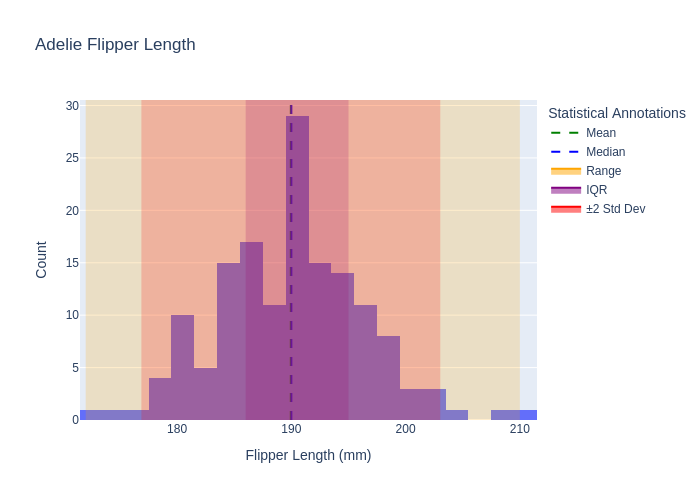

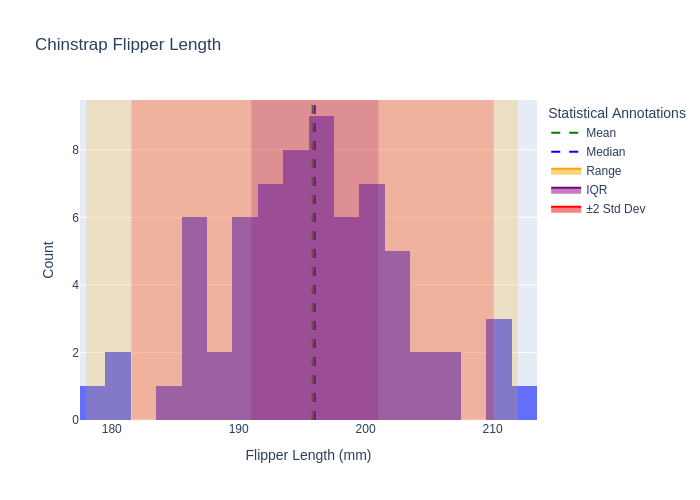

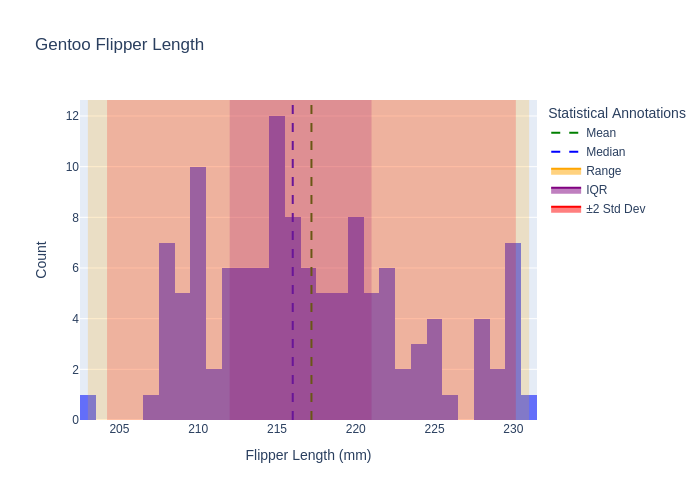

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Drop rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Define a function to create the plot for each species
def plot_flipper_length_for_species(df, species):
    # Filter data for the species
    species_data = df[df['species'] == species]
    
    # Calculate statistical markers
    mean_flipper = species_data['flipper_length_mm'].mean()
    median_flipper = species_data['flipper_length_mm'].median()
    min_flipper = species_data['flipper_length_mm'].min()
    max_flipper = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    std_dev = species_data['flipper_length_mm'].std()
    
    # Create the base figure with histogram
    fig = px.histogram(species_data, x='flipper_length_mm', nbins=30, title=f'{species} Flipper Length')

    # Add vertical lines for mean and median
    fig.add_vline(x=mean_flipper, line=dict(color='green', dash='dash'), name='Mean')
    fig.add_vline(x=median_flipper, line=dict(color='blue', dash='dash'), name='Median')
    
    # Add vertical rectangles for range, interquartile range (IQR), and ±2 standard deviations
    fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor="orange", opacity=0.2, line_width=0, name="Range")
    fig.add_vrect(x0=q1, x1=q3, fillcolor="purple", opacity=0.2, line_width=0, name="IQR")
    fig.add_vrect(x0=mean_flipper - 2 * std_dev, x1=mean_flipper + 2 * std_dev, fillcolor="red", opacity=0.2, line_width=0, name="±2 Std Dev")
    
    # Add custom traces for the legend
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='lines',
        line=dict(color='green', dash='dash'),
        showlegend=True,
        name='Mean'
    ))

    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='lines',
        line=dict(color='blue', dash='dash'),
        showlegend=True,
        name='Median'
    ))

    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='lines',
        line=dict(color='orange'),
        fill='toself',
        showlegend=True,
        name='Range'
    ))

    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='lines',
        line=dict(color='purple'),
        fill='toself',
        showlegend=True,
        name='IQR'
    ))

    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='lines',
        line=dict(color='red'),
        fill='toself',
        showlegend=True,
        name='±2 Std Dev'
    ))

    # Update layout for better readability
    fig.update_layout(
        xaxis_title="Flipper Length (mm)",
        yaxis_title="Count",
        showlegend=True,
        legend_title="Statistical Annotations"
    )
    
    return fig

# Create plots for each species
species_list = penguins['species'].unique()
for species in species_list:
    fig = plot_flipper_length_for_species(penguins, species)
    fig.show(renderer="png")


### 2

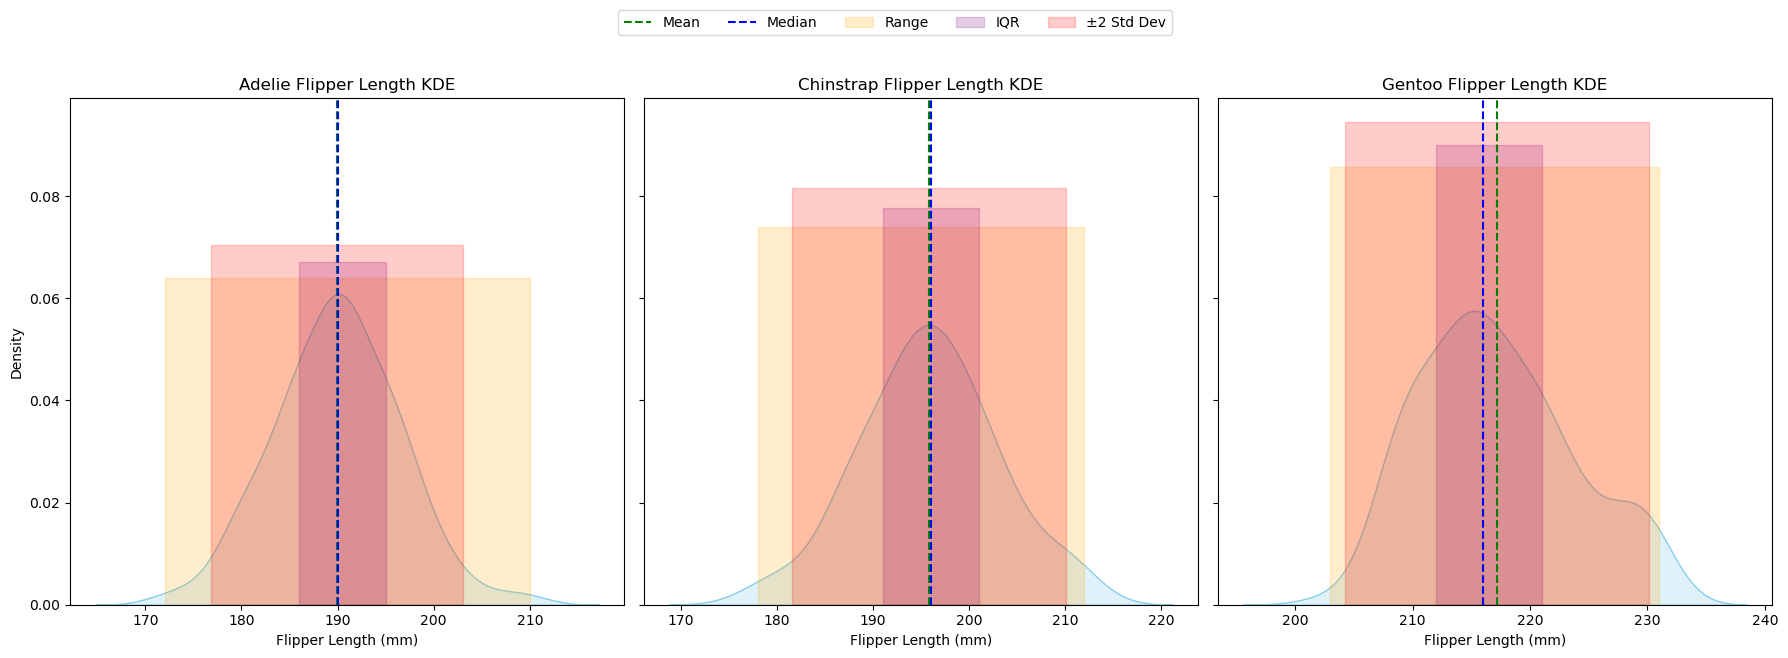

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Drop rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Define a function to plot KDE with annotations for each species
def plot_kde_with_stats(ax, species_data, species):
    # KDE plot
    sns.kdeplot(data=species_data, x="flipper_length_mm", ax=ax, fill=True, color='skyblue')

    # Calculate statistical markers
    mean_flipper = species_data['flipper_length_mm'].mean()
    median_flipper = species_data['flipper_length_mm'].median()
    min_flipper = species_data['flipper_length_mm'].min()
    max_flipper = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    std_dev = species_data['flipper_length_mm'].std()

    # Add vertical lines for mean and median
    ax.axvline(mean_flipper, color='green', linestyle='--', label='Mean')
    ax.axvline(median_flipper, color='blue', linestyle='--', label='Median')
    
    # Highlight range (min to max), IQR, and ±2 standard deviations
    ax.fill_betweenx([0, ax.get_ylim()[1]], min_flipper, max_flipper, color='orange', alpha=0.2, label='Range')
    ax.fill_betweenx([0, ax.get_ylim()[1]], q1, q3, color='purple', alpha=0.2, label='IQR')
    ax.fill_betweenx([0, ax.get_ylim()[1]], mean_flipper - 2 * std_dev, mean_flipper + 2 * std_dev, color='red', alpha=0.2, label='±2 Std Dev')
    
    # Title and labels
    ax.set_title(f'{species} Flipper Length KDE')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')

# Create a 1x3 grid of subplots for the three species
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Get the unique species and plot KDE for each
species_list = penguins['species'].unique()

for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    plot_kde_with_stats(axes[i], species_data, species)

# Add a legend (common for all subplots) and adjust layout
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.1))
plt.tight_layout()
plt.show()


### 3

I prefer histograms because they clearly show how frequently values occur within defined intervals (bins), show the general shape of the data distribution, which helps in identifying patterns (e.g., skewness, modality), and are easy to interpret because they directly map the number of occurrences in each bin.

### 4.

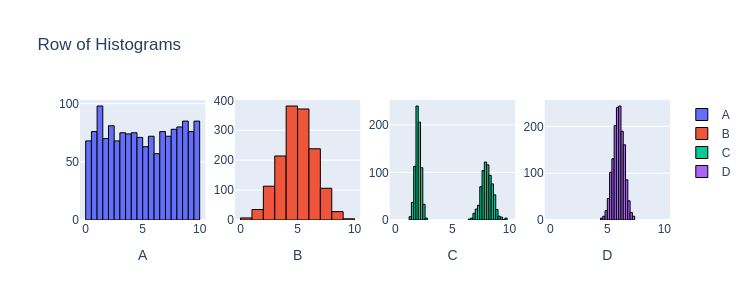

In [3]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Datasets A and C have similar means and similar variances.
2. Dataset B has a similar mean but quite different variance compared to datasets A and C.
3. None of the datasets have similar variances but quite different means.
4. Dataset D has quite a different mean and quite a different variance compared to datasets A, B, and C.

### 5

If the distribution is right-skewed, the tail on the right side towards the higher values is longer, and the mean is pulled to the right by these largers values in the tail, causing the mean to be greater than the median.
If the distribution is left-skewed, the tail on the left side towards the lower values is longer, and the mean is pulled to the left by these smaller values, causing the median to be greater than the mean.

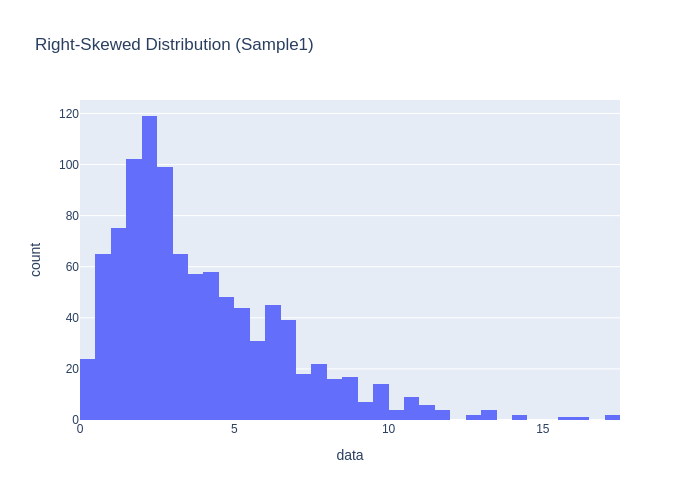

Sample1 Mean: 3.929665773731047
Sample1 Median: 3.099965238710528
Sample1 is right-skewed: Mean > Median


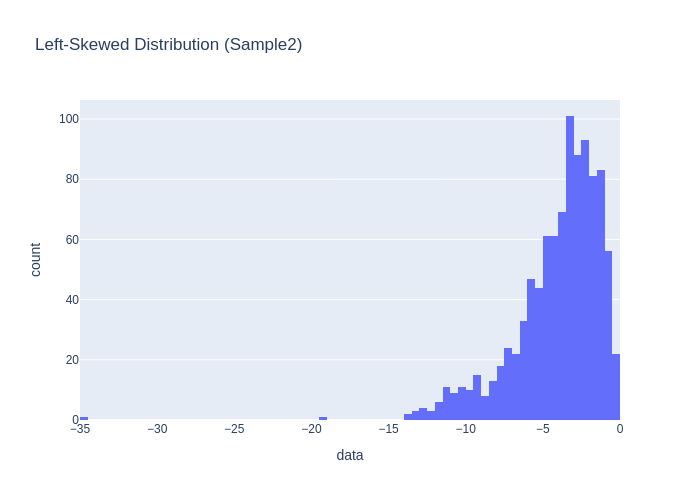

Sample2 Mean: -4.0735186687429294
Sample2 Median: -3.3432837752285636
Sample2 is left-skewed: Mean < Median


In [4]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate sample1: right-skewed distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Plot histogram for sample1
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Right-Skewed Distribution (Sample1)")
fig1.show(renderer="png")  # Use 'png' renderer for GitHub/MarkUs submissions

# Calculate mean and median for sample1
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])[0]

print(f"Sample1 Mean: {mean1}")
print(f"Sample1 Median: {median1}")

# Comparison of Mean and Median
if mean1 > median1:
    print("Sample1 is right-skewed: Mean > Median")
else:
    print("Sample1 is not right-skewed")

# Generate sample2: left-skewed distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Plot histogram for sample2
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Left-Skewed Distribution (Sample2)")
fig2.show(renderer="png")  # Use 'png' renderer for GitHub/MarkUs submissions

# Calculate mean and median for sample2
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])[0]

print(f"Sample2 Mean: {mean2}")
print(f"Sample2 Median: {median2}")

# Comparison of Mean and Median
if mean2 < median2:
    print("Sample2 is left-skewed: Mean < Median")
else:
    print("Sample2 is not left-skewed")


### 6 

In [5]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


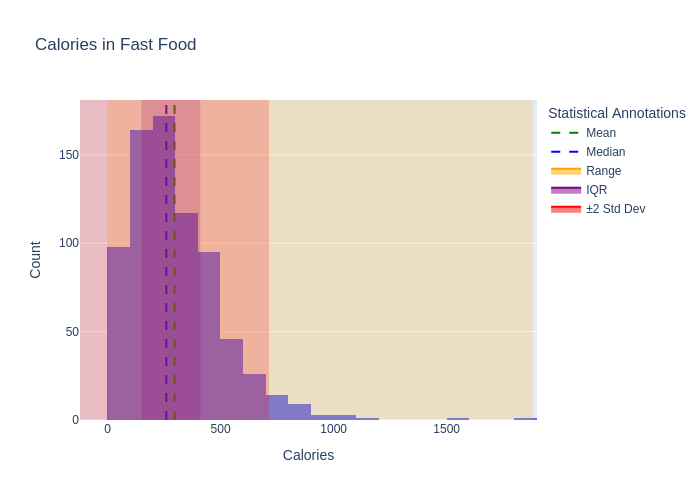

In [9]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

# Load the fast food dataset
fast_food = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
fast_food # df.columns

# Drop rows with missing values in calories
fast_food = fast_food.dropna(subset=['calories'])

mean_calories = fast_food['calories'].mean()
median_calories = fast_food['calories'].median()
min_calories = fast_food['calories'].min()
max_calories = fast_food['calories'].max()
q1 = fast_food['calories'].quantile(0.25)
q3 = fast_food['calories'].quantile(0.75)
std_dev = fast_food['calories'].std()

fig = px.histogram(fast_food, x='calories', nbins=30, title='Calories in Fast Food')
    
# Add vertical lines for mean and median
fig.add_vline(x=mean_calories, line=dict(color='green', dash='dash'), name="Mean")
fig.add_vline(x=median_calories, line=dict(color='blue', dash='dash'), name="Median")
    
# Add rectangles for range, interquartile range, and ±2 standard deviation
fig.add_vrect(x0=min_calories, x1=max_calories, fillcolor="orange", opacity=0.2, line_width=0, name="Range")
fig.add_vrect(x0=q1, x1=q3, fillcolor="purple", opacity=0.2, line_width=0, name="IQR")
fig.add_vrect(x0=mean_calories - 2 * std_dev, x1=mean_calories + 2 * std_dev, fillcolor="red", opacity=0.2, line_width=0, name="±2 Std Dev")
    
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='lines',
    line=dict(color='green', dash='dash'),
    showlegend=True,
    name='Mean'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='lines',
    line=dict(color='blue', dash='dash'),
    showlegend=True,
    name='Median'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='lines',
    line=dict(color='orange'),
    fill='toself',
    showlegend=True,
    name='Range'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='lines',
    line=dict(color='purple'),
    fill='toself',
    showlegend=True,
    name='IQR'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='lines',
    line=dict(color='red'),
    fill='toself',
    showlegend=True,
    name='±2 Std Dev'
))

# Update layout
fig.update_layout(
    xaxis_title="Calories",
    yaxis_title="Count",
    showlegend=True,
    legend_title="Statistical Annotations"
)

fig.show(renderer="png")

### 8

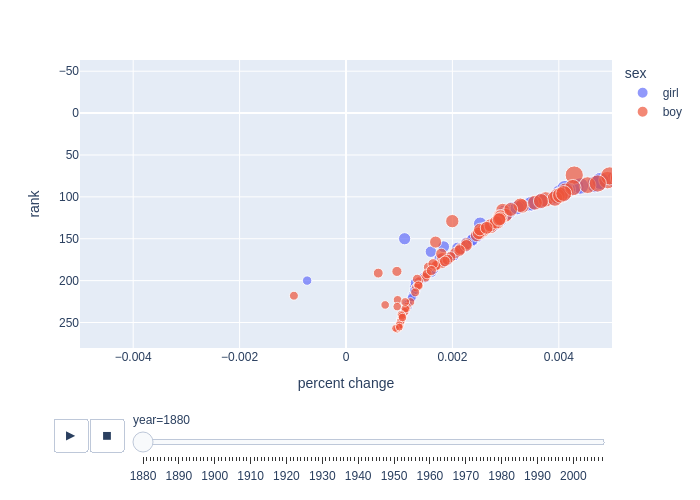

In [7]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
 # the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
 

### 9

yes